# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
###import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#read data
train=pd.read_csv("E:\\dataset\\loan_prediction\\train.csv")
test=pd.read_csv("E:\\dataset\\loan_prediction\\test.csv")

In [3]:
##Copy dataset from orginal dataset
df=train.copy()
df1=test.copy()

In [4]:
##shape of dataset
df.shape

(614, 13)

In [5]:
##shape of dataset
df1.shape

(367, 12)

In [6]:
##Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
##Information of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
##describe only numerical columnms in dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
##describe only numerical columnms in dataset
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
##Check NaN values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
##Check NaN values
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
##Calculating the ratio between test and train data
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0]) 

(0.6258919469928644, 0.37410805300713557)

# Data Types

There are three types of data in the dataset

int:integer format is a numerical values {columns - ApplicantIncome}.

float64:Float format is a decimal values {columns - CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History}.

object:Object format is a categorical variables {columns - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status}.

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Target (categorical Variable)

we will be look at target variable(Loan_Status)

In [14]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

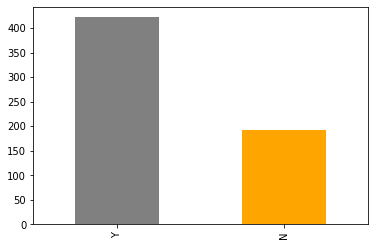

In [15]:
df['Loan_Status'].value_counts().plot.bar(color=['grey','orange'])

In [16]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

 #### Note:
 The loan of 422 out of 614 peoples loan was approved and the loan of 192 out of 614 loan was not approved.

## Univariate Analysis

Univariate analysis means analyzed the variable individually. we will use frequency table and bar plot

## Independent Categorical features 

There are 5 Features in categorical variable (Gender, Married, Education, Self_Employed, Credit_History).

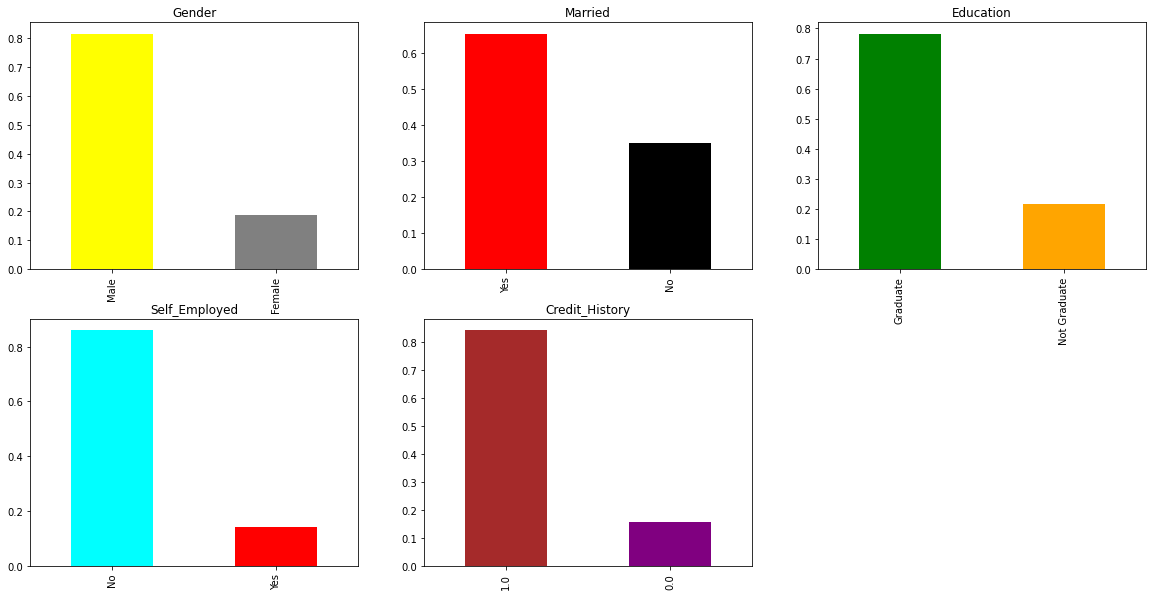

In [17]:
## Visualize the categorial variables
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender', color=['yellow','grey'])

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title='Married', color=['red','black'])

plt.subplot(233)
df['Education'].value_counts(normalize=True).plot.bar(title='Education', color=['green','orange'])

plt.subplot(234)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color=['cyan','red'])

plt.subplot(235)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color=['brown','purple'])

plt.show()

## It can be referred from above the barplots

#### Note:

1. 80% of people are Males and 20% peoples are Females in Gender Column.
2. Around 65% of Peoples are Married and 35% of people are Non-Married in Married Column.
3. Around 78% of peoples are Graduated and 22% of Peoples are Not Graduated in Education Column.
4. Around 85% of Peoples are Self-Employed and 16% of Peoples are Non-Self-employee in Self_Employed Column.
5. Around 85% of Peoples are have Credit history and 15% of Peoples are Not having Credit History.

## Independent Ordinal Variable

 There are 2 Features that are ordinal(Dependents,Property_Area)

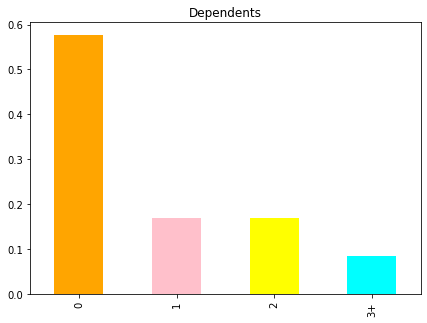

In [18]:
## Visualize the ordinal variables
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(7,5), title='Dependents',color=['orange','pink','yellow','cyan'])

#### Note:
More than 55% of Peoples don't have dependents and Around 17% of Peoples having one dependents, 18% of Peoples having two dependents and Less than 10% of Peoples having more than Three dependents.

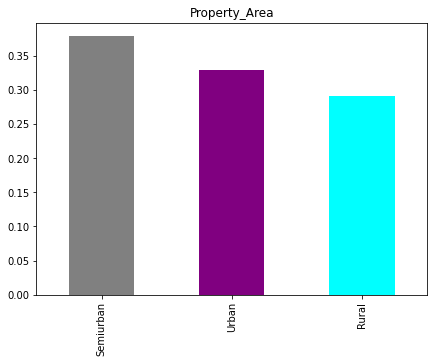

In [19]:
## Visualize the ordinal variables
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(7,5), title='Property_Area',color=['grey','purple','cyan'])

#### Note:
More than 35% of Peoples is Semiurban area and More than 30% of Peoples is Urban Area, 25% of Peoples is Rural area.

## Independent Numerical Variable
There are 4 features in Numerical variable (columns - CoapplicantIncome, LoanAmount,L oan_Amount_Term, ApplicantIncome)

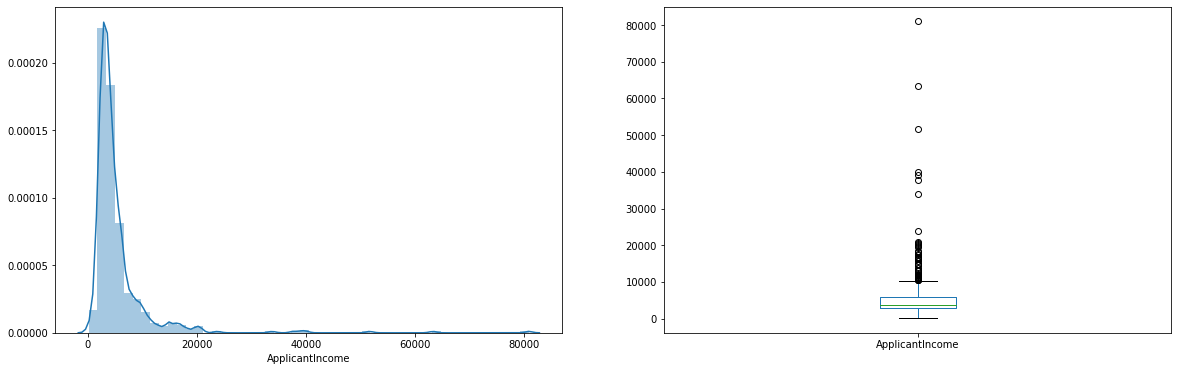

In [20]:
## Visualize Numerical variable
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(20,6))

plt.show()

#### Note:
The above graph we can see most of the distribution of applicant is left side skewed so the data is not normal distributed, we can see some of ouliers in boxplot. We will try to make it normal distributed and we will try to remove ouliers also.

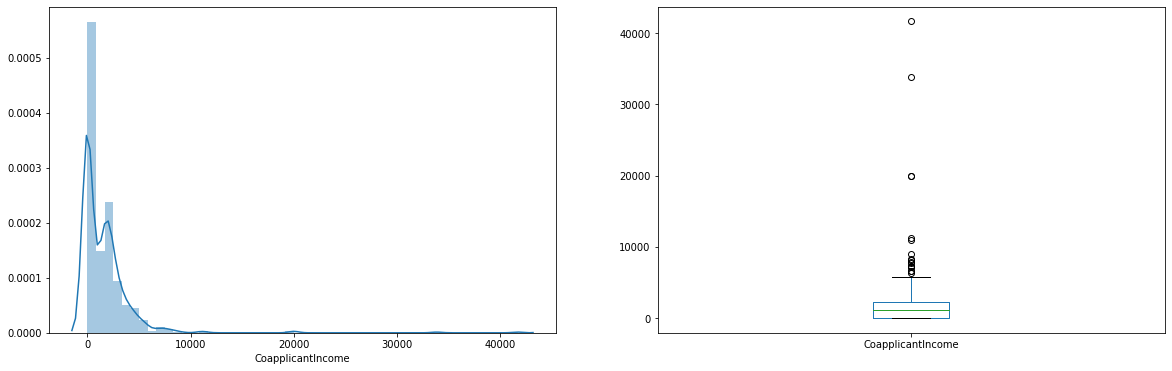

In [21]:
## Visualize Numerical variable
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(20,6))

plt.show()

#### Note:
The graph also similiar to the above graph most of the co-applicant income range between 0 to 6000, the distribution of co applicant is left side so it is not normally distributed.
The boxplot presence some of outiers in the coapplicantincome.

In [22]:
df_dup=df.copy()

In [23]:
df_dup.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df['LoanAmount'].isnull().sum()

22

In [25]:
df_dup=df_dup.dropna()

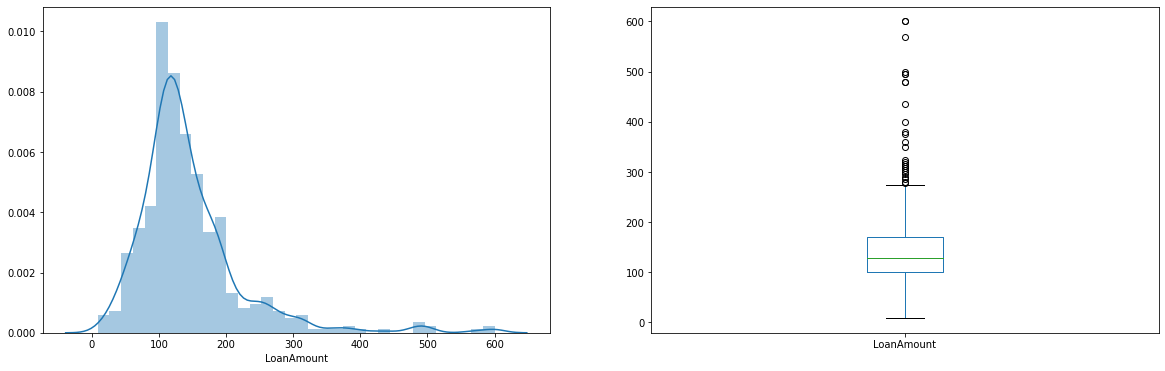

In [26]:
## Visualize Numerical variable
plt.subplot(121)
sns.distplot(df_dup['LoanAmount']);
plt.subplot(122)
df_dup['LoanAmount'].plot.box(figsize=(20,6))
plt.show()

#### Note:
The distribution of LoanAmount is slightly right side it is normally distributed but there are lot of outliers is presence in boxplot.

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Loan Amount term is a Discrete variable so we can use frequency table and Barplot.

Around 85% of peoples loan amount term is 360 days and 8% of peoples loan term is 180 days and below 5% of peoples 480 days, below 3% of peoples loan amount term 300 days other terms are less than 1% of peoples.

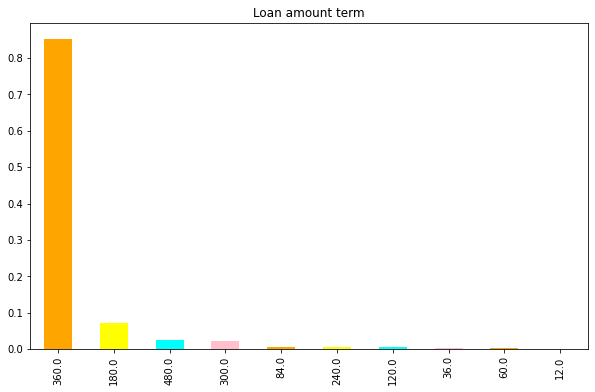

In [28]:
## Visualize the dataset
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(figsize=(10,6), title = 'Loan amount term', color=['orange','yellow','cyan','pink'])

## Bivariate Analysis
Bivariate analysis means we will calculate categorical variable vs target variable. we can use bivariate analysis to test the hypothesis testing.
First of all we have to compare relationship between categorical vs Target variable.

In [29]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

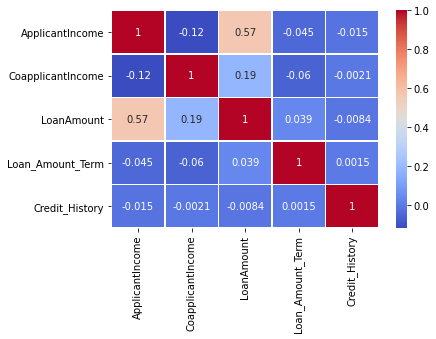

In [30]:
## Correlation of the dataset
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',linewidth=0.6)

Text(0.5, 1.0, 'Gender vs Loan_status')

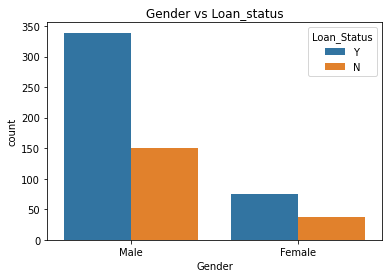

In [31]:
## Visualize the categorical vs target variable
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title("Gender vs Loan_status")

#### Note:
The above graph presence 340+ out of 614 counts males of loan status was approved and around 150 males loan was not approved.The 75+ of Female loan was approved and below 50 females loan was not approved.

Text(0.5, 1.0, 'Married vs Loan_status')

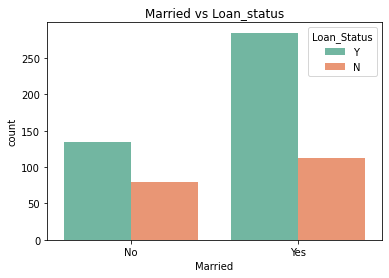

In [32]:
##seaborn countplot
sns.countplot(x='Married',hue='Loan_Status',data=df, palette='Set2')
plt.title("Married vs Loan_status")

#### Note:
The above graph represents 140 non-married peoples loan was approved and 75 non-married peoples loan was not approved. Around 275 married peoples loan was approved and 100 married peoples loan was not approved.

Text(0.5, 1.0, 'Education vs Loan_status')

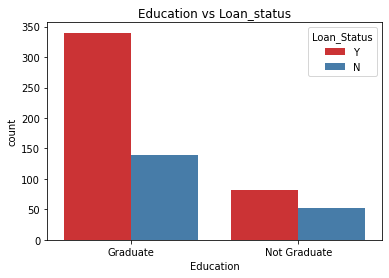

In [33]:
##seaborn countplot
sns.countplot(x='Education',hue='Loan_Status',data=df, palette='Set1')
plt.title("Education vs Loan_status")

#### Note:
The above graph presence around 340 graduate peoples loan was approved and 140 graduate peoples loan was not approved.Around 75 non-graduate peoples loan was approved and 50 non-graduate peoples loan was not approved.

Text(0.5, 1.0, 'Property_Area vs Loan_status')

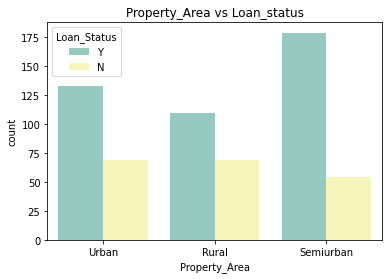

In [34]:
##seaborn countplot
sns.countplot(x='Property_Area',hue='Loan_Status',data=df, palette='Set3')
plt.title("Property_Area vs Loan_status")

#### Note:
The Above graph presence 130 urban area peoples loan was approved and 70 urban area peoples loan was not approved.Around 110 Rural area peoples loan was approved and 70 rural area peoples loan was not approved.Around 175 semiurban area peoples loan was approved and 50 semiurban peoples loan was not approved. 

Text(0.5, 1.0, 'Self_Employed vs Loan_status')

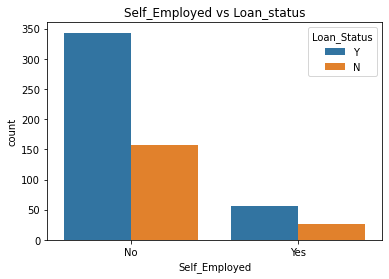

In [35]:
##seaborn countplot
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)
plt.title("Self_Employed vs Loan_status")

#### Note:
This graph presence around 340 self_employed peoples loan was approved and 150 self_employed loan was not approved.Around 50 non-Self_employed peoples loan was approved and below 50 non-self_employed peoples loan was not approved.

Text(0.5, 1.0, 'Credit_History vs Loan_status')

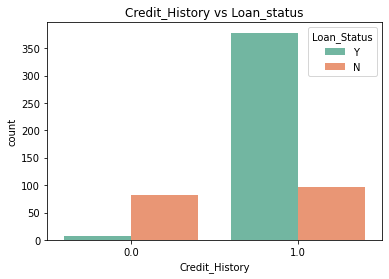

In [36]:
##seaborn countplot
sns.countplot(x='Credit_History',hue='Loan_Status',data=df,palette='Set2')
plt.title("Credit_History vs Loan_status")

#### Note:
This graph presence below 5 of peoples loan was approved with not having any credit history and 75 peoples loan was not approved with not having any credit history. Around 350+ peoples loan was approved with having credit_history and 100 peoples loan was not approved with having credit_history. 

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan_status')

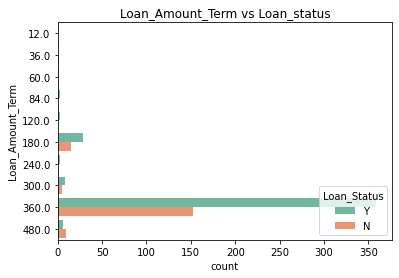

In [37]:
##seaborn countplot
sns.countplot(data=df,y='Loan_Amount_Term',hue='Loan_Status',palette='Set2')
plt.title("Loan_Amount_Term vs Loan_status")

#### Note:
The above graph is presence most of the peoples loan amount term is 360 months, below 25 peoples loan amount term is 180 and 300 months.

Text(0.5, 1.0, 'Dependents vs Loan_status')

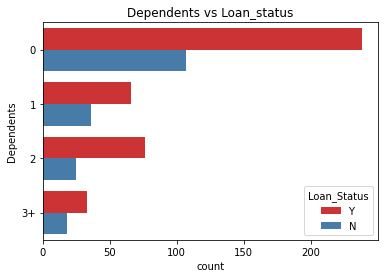

In [38]:
##seaborn countplot
sns.countplot(data=df, y='Dependents',hue='Loan_Status', palette='Set1')
plt.title("Dependents vs Loan_status")

#### Note:
This graph represents most of the loan approved peoples without having any dependents.Around 70 peoples having one dependents and 80 peoples having two dependents,below 50 peoples having 3+ dependents.
most of the loan not approved peoples without having any dependents.Around 40 peoples having one dependents and 25 peoples having two dependents,below 20 peoples having 3+ dependents.

In [39]:
print(max(df["CoapplicantIncome"]))

41667.0


In [40]:
df["CoapplicantIncome"].value_counts().head(10)

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
1459.0      3
2333.0      3
1800.0      3
1625.0      3
2250.0      3
Name: CoapplicantIncome, dtype: int64

In [41]:
df_dup["totalIncome"]=df_dup["CoapplicantIncome"]+df_dup["ApplicantIncome"]

In [42]:
## Make bins
bins=[0,2000,5000,25000,50000]
group=['low','average','high','veryhigh']
df_dup["ApplicantIncome"]=pd.cut(df_dup["ApplicantIncome"],bins,labels=group)

Text(0, 0.5, 'percentage')

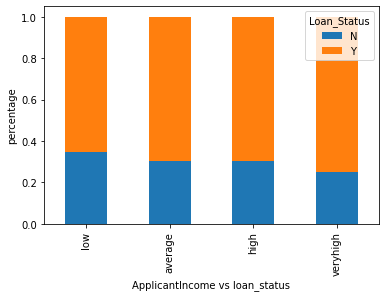

In [43]:
##Plotting
ApplicantIncome=pd.crosstab(df_dup['ApplicantIncome'],df_dup['Loan_Status'])
ApplicantIncome.div(ApplicantIncome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome vs loan_status")
plt.ylabel("percentage")

In [44]:
## Make bins
bins=[0,2000,5000,25000,50000]
group=['low','average','high','veryhigh']
df_dup["CoapplicantIncome"]=pd.cut(df_dup["CoapplicantIncome"],bins,labels=group)

Text(0, 0.5, 'percentage')

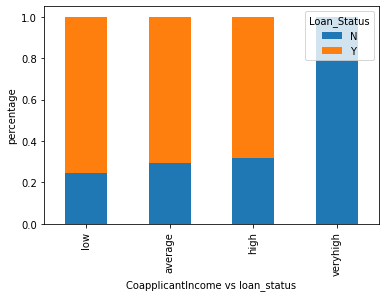

In [45]:
##Plotting
CoapplicantIncome=pd.crosstab(df_dup['CoapplicantIncome'],df_dup['Loan_Status'])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome vs loan_status")
plt.ylabel("percentage")

In [46]:
## Make bins
bins=[0,2000,5000,25000,50000]
group=['low','average','high','veryhigh']
df_dup["totalIncome"]=pd.cut(df_dup["totalIncome"],bins,labels=group)

Text(0, 0.5, 'percentage')

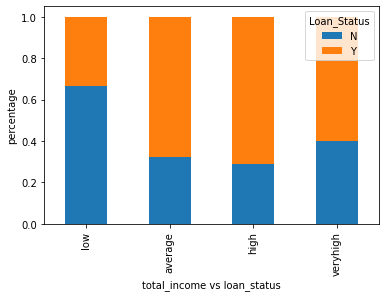

In [47]:
total_income=pd.crosstab(df_dup['totalIncome'],df_dup['Loan_Status'])
total_income.div(total_income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("total_income vs loan_status")
plt.ylabel("percentage")

#### Note:
We can see the applicants have low income to getting chance to approve also low, applicants with high income will be more chances get approval.

In [48]:
print(len(df[df["CoapplicantIncome"]==0]))
"percentage of co-applicant 0 is:",len(df[df['CoapplicantIncome']==0])/len(df['CoapplicantIncome'])

273


('percentage of co-applicant 0 is:', 0.44462540716612375)

#### Note:
Co-Applicant income was not affected of loan approval process

In [49]:
## Make bins
bins=[0,100,200,800]
group=['low','average','high']
df_dup["LoanAmount"]=pd.cut(df_dup["LoanAmount"],bins,labels=group)

Text(0, 0.5, 'percentage')

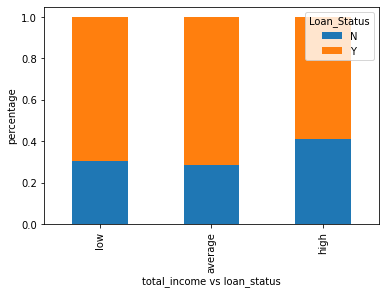

In [50]:
LoanAmount=pd.crosstab(df_dup['LoanAmount'],df_dup['Loan_Status'])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("total_income vs loan_status")
plt.ylabel("percentage")

#### Note:
The chance of loan approval wiil be high, when loan amount is less.

In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


#### Note:
There is no duplicate values in the dataset.

In [55]:
df_dup.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
1,LP001003,Male,Yes,1,Graduate,No,average,low,average,360.0,1.0,Rural,N,high
2,LP001005,Male,Yes,0,Graduate,Yes,average,NaN,low,360.0,1.0,Urban,Y,average
3,LP001006,Male,Yes,0,Not Graduate,No,average,average,average,360.0,1.0,Urban,Y,average
4,LP001008,Male,No,0,Graduate,No,high,NaN,average,360.0,1.0,Urban,Y,high
5,LP001011,Male,Yes,2,Graduate,Yes,high,average,high,360.0,1.0,Urban,Y,high


In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [58]:
dup=df.copy()

In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
### Change variables object to integer
df['Dependents'].replace('3+', 3, inplace=True)
df1['Dependents'].replace('3+', 3, inplace=True)

In [61]:
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

## Data Preprocessing

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors


There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.

In [62]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

## Impute Missing values

In [63]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [64]:
df.Gender=imputer.fit_transform(df['Gender'].values.reshape(-1,1))

In [65]:
df.Married=imputer.fit_transform(df['Married'].values.reshape(-1,1))

In [66]:
df.Dependents=imputer.fit_transform(df['Dependents'].values.reshape(-1,1))

In [67]:
df.Self_Employed=imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [68]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='mean')

In [69]:
df.LoanAmount=imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [70]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='median')

In [71]:
df.Loan_Amount_Term=imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [72]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df.Credit_History=imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Credit_History'].isnull().value_counts()

False    614
Name: Credit_History, dtype: int64

In [73]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df1.Gender=imputer.fit_transform(df1['Gender'].values.reshape(-1,1))
df1.Married=imputer.fit_transform(df1['Married'].values.reshape(-1,1))
df1.Dependents=imputer.fit_transform(df1['Dependents'].values.reshape(-1,1))
df1.Self_Employed=imputer.fit_transform(df1['Self_Employed'].values.reshape(-1,1))

In [75]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='mean')
df1.LoanAmount=imputer.fit_transform(df1['LoanAmount'].values.reshape(-1,1))

In [76]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='median')
df1.Loan_Amount_Term=imputer.fit_transform(df1['Loan_Amount_Term'].values.reshape(-1,1))

In [77]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df1.Credit_History=imputer.fit_transform(df1['Credit_History'].values.reshape(-1,1))
df1['Credit_History'].isnull().value_counts()

False    367
Name: Credit_History, dtype: int64

In [78]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outliers Treatment

Outliers are extreme values that fall a long way outside of the other observations. ... The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

## Interquartile Range (IQR) based method
The same concept used in box plots is used here. We identify the outliers as values less than Q1 -(1.5*IQR) or greater than Q3+(1.5*IQR).

In [79]:
Q1=np.percentile(df.LoanAmount, 25)
Q3=np.percentile(df.LoanAmount, 75)

IQR=Q3-Q1

lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

In [80]:
df[df['LoanAmount']<lower]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [81]:
df[df['LoanAmount']>upper]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,1
34,LP001100,Male,No,3,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,0
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,0
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,1
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,0
126,LP001448,Male,Yes,3,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,1
135,LP001488,Male,Yes,3,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,0


## Standard Deviation based method
In this method, we use standard deviation and mean to detect outliers as shown below

In [82]:
mean=np.mean(df['LoanAmount'])
std=np.std(df['LoanAmount'])

In [83]:
df[df['LoanAmount'] > mean + 3 * std] ## Outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,1
155,LP001536,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,1
171,LP001585,Male,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
177,LP001610,Male,Yes,3,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,0
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,1
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,0
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,1
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,0
432,LP002386,Male,No,0,Graduate,No,12876,0.0,405.0,360.0,1.0,Semiurban,1
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,0


In [84]:
df[df['LoanAmount'] < mean - 3 * std] ## Outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Histogram
Histogram also displays these outliers clearly

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029ED477DEB8>]],
      dtype=object)

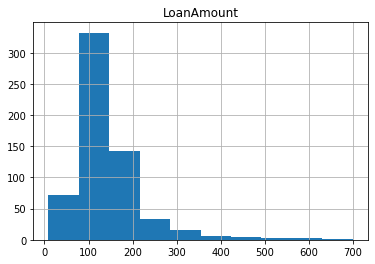

In [85]:
df.hist(column=['LoanAmount'])

## Z Score outliers detection
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

In [86]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['LoanAmount']))
print(z)

[0.00000000e+00 2.19273315e-01 9.57640999e-01 3.14546564e-01
 6.44542845e-02 1.43609940e+00 6.12275469e-01 1.38001371e-01
 2.57092933e-01 2.41265020e+00 9.10004374e-01 4.45547283e-01
 6.38185931e-01 3.86001502e-01 1.54118965e+00 2.55000784e-01
 5.52729688e-01 8.38549437e-01 1.59727534e-01 3.74092345e-01
 5.05093063e-01 2.00773889e+00 3.62183189e-01 4.09819814e-01
 5.46372774e-02 5.31003525e-01 2.90728252e-01 4.33638126e-01
 1.32682484e+00 3.14546564e-01 6.50095087e-01 8.62367749e-01
 4.81274751e-01 3.86001502e-01 2.06728467e+00 0.00000000e+00
 5.52729688e-01 2.87268159e-02 4.47639432e-01 4.33638126e-01
 7.90912812e-01 1.18391497e+00 8.50458593e-01 1.47818378e-01
 6.00366313e-01 6.95639562e-01 1.21964243e+00 2.87268159e-02
 3.14546564e-01 2.87268159e-02 5.52729688e-01 3.14546564e-01
 4.09819814e-01 1.47818378e-01 1.66237336e+00 5.88457157e-01
 6.00366313e-01 1.35909222e-01 4.00002807e-01 2.87268159e-02
 3.14546564e-01 5.64638844e-01 2.21365464e-01 0.00000000e+00
 3.62183189e-01 1.328916

In [87]:
## Finding Outliers
threshold = 3
print(np.where(z > 3))

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604], dtype=int64),)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029ED4779A58>]],
      dtype=object)

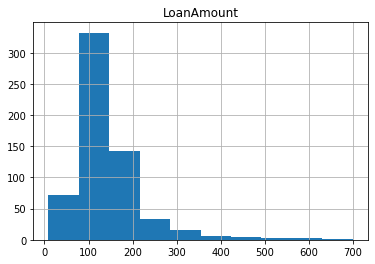

In [88]:
## removing skewness using log transforms
## Before log transformation
df.hist(column=['LoanAmount']) ## Train data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029ED618F898>]],
      dtype=object)

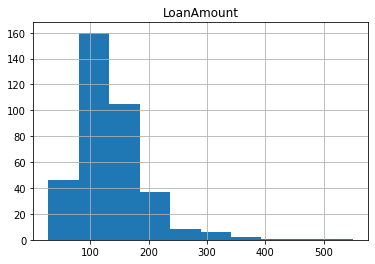

In [89]:
## test data
df1.hist(column=['LoanAmount'])

In [90]:
df['loanamount_log']=np.log(df['LoanAmount'])
df1['loanamount_log']=np.log(df1['LoanAmount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029ED633E160>]],
      dtype=object)

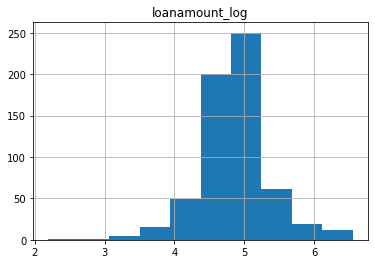

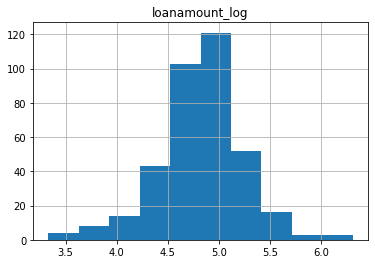

In [91]:
## After Log Transformaation
df.hist(column=['loanamount_log'])
df1.hist(column=['loanamount_log'])

In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760


In [93]:
gender=pd.get_dummies(df['Gender'],drop_first=True)### 1 is male and 0 is female
df=pd.concat([df,gender],axis=1)

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [95]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])### 1 is Yes and 0 is No

In [96]:
df=df.drop(['Gender'],axis=1)
df=df.rename(columns={'Male' : 'Gender'})

In [97]:
df['Property_Area'].value_counts()

##Rural      -  0
##Semiurban  -  1
##Urban       - 2

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [98]:
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [99]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

##NO - 0
##YES - 1

In [100]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [101]:
df['Education']=le.fit_transform(df['Education'])

##Graduate - 0
##Non_Graduate - 1

In [102]:
df['Married']=le.fit_transform(df['Married'])

##NO - 0
##Yes - 1

In [103]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [104]:
df['Gender']=df['Gender'].astype(int)

In [105]:
df['Credit_History']=df['Credit_History'].astype(int)

In [106]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loanamount_log       0
dtype: int64

In [107]:
gender=pd.get_dummies(df1['Gender'],drop_first=True)### 1 is male and 0 is female
df1=pd.concat([df1,gender],axis=1)

In [108]:
df1=df1.drop(['Gender'],axis=1)

In [109]:
df1=df1.rename(columns={'Male' : 'Gender'})

In [110]:
le=LabelEncoder()
df1['Property_Area']=le.fit_transform(df1['Property_Area'])
df1['Self_Employed']=le.fit_transform(df1['Self_Employed'])
df1['Education']=le.fit_transform(df1['Education'])
df1['Married']=le.fit_transform(df1['Married'])
df1['Dependents']=df1['Dependents'].astype(int)
df1['Gender']=df1['Gender'].astype(int)
df1['Credit_History']=df1['Credit_History'].astype(int)

In [111]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log,Gender
0,LP001002,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,4.986426,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,4.852030,1
2,LP001005,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,4.189655,1
3,LP001006,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4.787492,1
4,LP001008,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,4.948760,1


In [112]:
df1.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanamount_log,Gender
0,LP001015,1,0,0,0,5720,0,110.0,360.0,1,2,4.700480,1
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1,2,4.836282,1
2,LP001031,1,2,0,0,5000,1800,208.0,360.0,1,2,5.337538,1
3,LP001035,1,2,0,0,2340,2546,100.0,360.0,1,2,4.605170,1
4,LP001051,0,0,1,0,3276,0,78.0,360.0,1,2,4.356709,1


In [113]:
train=df.copy()
test=df1.copy()

# Model Evaluation 

## Evaluation Metrics for Classification Problems

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

**Accuracy**: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values.

True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
True Negative - Targets which are actually false(N) and we have predicted them false(N)
False Positive - Targets which are actually false(N) but we have predicted them true(T)
False Negative - Targets which are actually true(T) but we have predicted them false(N)
Using these values, we can calculate the accuracy of the model. The accuracy is given by:

**Accuracy** = (TP+TN) / (TP+TN+FP+FN)

**Precision**: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.

**Precision** = TP / (TP + FP)

**Recall (Sensitivity)** - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. E.g. Proportion of patients with a disease who test positive.

**Recall** = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly. E.g. Proportion of patients without the disease who test negative.

Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

**ROC curve**

Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (Sensitivity) and false positive rate (1- Specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.
The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.

In [114]:
train=train.drop(['LoanAmount'],axis=1)
test=test.drop(['LoanAmount'],axis=1)

# Model Building

Let us make predict our first model using logistic regression which is predict binary classification output.
Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

In [117]:
X=train.drop(['Loan_Status'],axis=1)
y=train["Loan_Status"]

In [118]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.37, random_state=0)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.metrics import roc_auc_score

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [122]:
log=LogisticRegression()

In [123]:
log.fit(X_train, y_train)
y_preds = log.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        66
           1       0.82      0.99      0.89       162

    accuracy                           0.83       228
   macro avg       0.88      0.72      0.75       228
weighted avg       0.85      0.83      0.81       228

0.8333333333333334


This **Logistic Regression** Model accuracy is 83.33%

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 4)

In [126]:
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.39      0.23      0.29        66
           1       0.73      0.86      0.79       162

    accuracy                           0.68       228
   macro avg       0.56      0.54      0.54       228
weighted avg       0.63      0.68      0.64       228

0.6754385964912281


In [127]:
dt.fit(X_train, y_train)
y_preds = dt.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        66
           1       0.80      0.86      0.83       162

    accuracy                           0.75       228
   macro avg       0.69      0.67      0.68       228
weighted avg       0.74      0.75      0.74       228

0.75


[[ 31  35]
 [ 22 140]]


Text(33.0, 0.5, 'True')

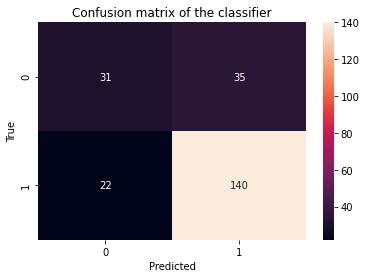

In [128]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_preds)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [129]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gnb=GaussianNB()

In [132]:
gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        66
           1       0.81      0.98      0.89       162

    accuracy                           0.82       228
   macro avg       0.85      0.71      0.74       228
weighted avg       0.83      0.82      0.80       228

0.8245614035087719


In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

In [134]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63        66
           1       0.82      0.99      0.90       162

    accuracy                           0.84       228
   macro avg       0.88      0.73      0.76       228
weighted avg       0.85      0.84      0.82       228

0.8377192982456141


In [135]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty="l1", max_iter=5)

In [136]:
sgd.fit(X_train, y_train)
y_preds = sgd.predict(X_test)
roc_auc_score(y_test, y_preds)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        66
           1       0.00      0.00      0.00       162

    accuracy                           0.29       228
   macro avg       0.14      0.50      0.22       228
weighted avg       0.08      0.29      0.13       228

0.2894736842105263


# HyperParameter Tuning

In [137]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [2,3],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf':[3,4,5]}

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
from sklearn.ensemble import RandomForestClassifier
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9)
rnd_search.fit(X_train,y_train)
rnd_search.best_params_
rnd_search.best_score_

0.7980189491817398

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [141]:
y_preds = rf.predict(X_test)
print (classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.48      0.61        66
           1       0.82      0.96      0.88       162

    accuracy                           0.82       228
   macro avg       0.82      0.72      0.75       228
weighted avg       0.82      0.82      0.80       228

0.8201754385964912
[[ 32  34]
 [  7 155]]


# Logistic Regression using stratified k-folds cross validation
To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
It is generally a better approach when dealing with both bias and variance.
A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.
If K=N, then it is called Leave one out cross validation, where N is the number of observations.





Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset. The folds are made by preserving the percentage of samples for each class. In stratified k-fold, each fold contains roughly the same proportions of the different types of class labels



In [142]:
i=1
kf=StratifiedKFold(n_splits=5, random_state=5, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print("\n{} of kfold".format(i,kf.n_splits))
    x_train,x_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    i+=1
    
    
    model=RandomForestClassifier(random_state=20, n_estimators=10, max_depth=3)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    eval=accuracy_score(y_test,pred)
    print("accuracy_score",eval)


1 of kfold
accuracy_score 0.7967479674796748

2 of kfold
accuracy_score 0.7479674796747967

3 of kfold
accuracy_score 0.8292682926829268

4 of kfold
accuracy_score 0.8048780487804879

5 of kfold
accuracy_score 0.8524590163934426


In [158]:
roc_auc_score(y_test,pred)

0.7703634085213033

The accuracy_score has improved from 83.33% to 85.24%

## Feature Importance

Let us find which features are important in this problem.

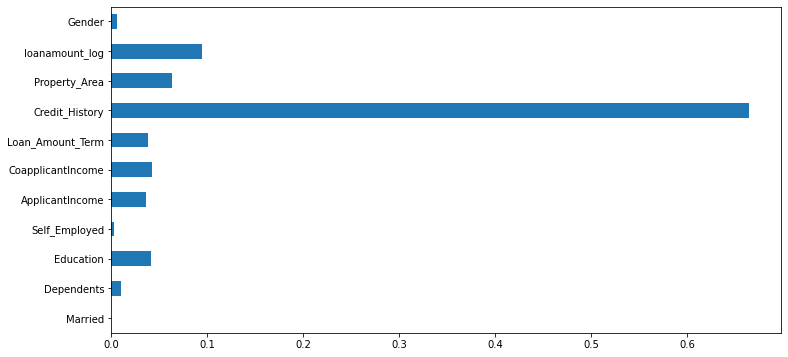

In [143]:
## Extract features
features=pd.Series(model.feature_importances_, index=X.columns)
features.plot(kind='barh',figsize=(12,6))

This graph presence **Credit history** most important Features in this problem.

In [144]:
pred_test=model.predict(test)

In [148]:
test=pd.read_csv("E:\\dataset\\loan_prediction\\test.csv")

In [145]:
output=pd.DataFrame()

In [150]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
Loan_Id=test['Loan_ID']

In [152]:
output['Loan_ID']=Loan_Id
output['Loan_Status']=pred_test

In [155]:
# replace with "N" and "Y"
output['Loan_Status'].replace(0, 'N', inplace=True)
output['Loan_Status'].replace(1, 'Y', inplace=True)

In [156]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [157]:
output[['Loan_ID','Loan_Status']].to_csv('Home_Loan_prediction.csv',index=False)

# Conclusion

After trying and testing different algorithms, The best accuracy is **random forest algorithm got (85.24%)** and **LogisticRegression** algorithm got around **(82%)**. We tried our best and add more features using hyperparameter tuning but it did not work to improve accuracy

There are many things to do for improving accuracy but we tried,Finally this project help me to understanding the how real world problems are working and how we are implementing machine learning in real world.
